# Introduction

In this project, we deal with the task of classifying cartoonized images. Cartoonizing a given real-world photo can be done via the CartoonGAN model (paper link: https://openaccess.thecvf.com/content_cvpr_2018/papers/Chen_CartoonGAN_Generative_Adversarial_CVPR_2018_paper.pdf). This is a type of GAN that was specifically designed and trained to modify real-world images as cartoon style.

Now let's consider the task of classifying an image as 'dog' or 'cat'. We can imagine that for humans, the level of difficulty of *classifying a real-world dog image as a dog* and the level of difficulty of *classifying a cartoonized dog image as a dog* would be pretty similar (and similarly for cats).

The question of our interest is: "Does this also hold for image classification models?"

More specifically,
- If we train an image classification model with cartoonized images (as a binary classification of dogs and cats), how well will it perform on classifying real-world images of dogs and cats? (***TRAIN & VALIDATION: cartoonized images, TEST: real-world images***)
- If we train an image classification model with real-world images (as a binary classification of dogs and cats), how well will it perform on classifying cartoonized images of dogs and cats? (***TRAIN & VALIDATION: real-world images, TEST: cartoonized images***)

# Dataset

For our data, we will use the Oxford-IIIT Pet Dataset (link: https://www.robots.ox.ac.uk/~vgg/data/pets/). This dataset consists of many images of various kinds of dogs and cats: total 4990 dog images and 2400 cat images. The dataset provides the specific type of dog/cat for each image (25 dog types, 12 cat types), but here we will just focus on whether an image is a dog or a cat.

We have total 4990 dog images and 2400 cat images, so we will randomly choose (by stratifying for each dog type) half of the dog images to use in our classication. This process was done already (outside this jupyter notebook), so we just provide the code.

For each dog type, we first randomly choose half of the images, and then split them into train, val, and test (60:20:20 proportion).

In [ ]:
import random
from shutil import copyfile

In [ ]:
# make a dictionary where each key is each dog type, and each value is a list containing all the image file names for that dog type.
each_dogtype_filenames = dict()
for filename in listdir('oxford_pet_dataset/dogs/'):
    if not filename.endswith('jpg'):
        continue
    dogtype = filename.split('_')[0]
    # to deal with 'american_bulldog', 'american_pit_bull_terrier', ''english_cocker_spaniel', 'english_setter'
    if dogtype in ['american', 'english']:
        dogtype = dogtype + '_' + filename.split('_')[1]
    if dogtype not in each_dogtype_filenames:
        each_dogtype_filenames[dogtype] = []
    each_dogtype_filenames[dogtype].append(filename)

In [ ]:
# for each dog type, first randomly choose half of the file names
# and then split them into train, val, and test (60:20:20 proportion)
for dogtype, filenames in each_dogtype_filenames.items():
    filenames = random.sample(filenames, len(filenames)//2)
    train_filenames = random.sample(filenames, int(len(filenames)*0.6))
    remaining = list(set(filenames) - set(train_filenames))
    val_filenames = random.sample(remaining, int(len(filenames)*0.2))
    test_filenames = list(set(remaining) - set(val_filenames))
    for train_filename in train_filenames:
        copyfile('oxford_pet_dataset/dogs/{}'.format(train_filename), 'oxford_pet_dataset/train/dogs/{}'.format(train_filename))
    for val_filename in val_filenames: 
        copyfile('oxford_pet_dataset/dogs/{}'.format(val_filename), 'oxford_pet_dataset/val/dogs/{}'.format(val_filename))
    for test_filename in test_filenames: 
        copyfile('oxford_pet_dataset/dogs/{}'.format(test_filename), 'oxford_pet_dataset/test/dogs/{}'.format(test_filename))

For each cat type, we split all the images into train, val, and test (60:20:20 proportion).

In [ ]:
# make a dictionary where each key is each cat type, and each value is a list containing all the image file names for that cat type.
each_cattype_filenames = dict()
for filename in listdir('oxford_pet_dataset/cats/'):
    if not filename.endswith('jpg'):
        continue
    cattype = filename.split('_')[0]
    if cattype not in each_cattype_filenames:
        each_cattype_filenames[cattype] = []
    each_cattype_filenames[cattype].append(filename)

In [ ]:
# for each cat type, split the file names into train, val, and test (60:20:20 proportion)
for cattype, filenames in each_cattype_filenames.items():
    train_filenames = random.sample(filenames, int(len(filenames)*0.6))
    remaining = list(set(filenames) - set(train_filenames))
    val_filenames = random.sample(remaining, int(len(filenames)*0.2))
    test_filenames = list(set(remaining) - set(val_filenames))
    for train_filename in train_filenames:
        copyfile('oxford_pet_dataset/cats/{}'.format(train_filename), 'oxford_pet_dataset/train/cats/{}'.format(train_filename))
    for val_filename in val_filenames: 
        copyfile('oxford_pet_dataset/cats/{}'.format(val_filename), 'oxford_pet_dataset/val/cats/{}'.format(val_filename))
    for test_filename in test_filenames: 
        copyfile('oxford_pet_dataset/cats/{}'.format(test_filename), 'oxford_pet_dataset/test/cats/{}'.format(test_filename))

As a result, we have total 4894 images:
- training data: 1496 dog images, 1440 cat images
- validation data: 498 dog images, 480 cat images
- test data: 500 dog images, 480 cat images

# Cartoonizing

For cartoonizing the images via pre-trained CartoonGAN, we use the *test.py* script in this github repo: https://github.com/Yijunmaverick/CartoonGAN-Test-Pytorch-Torch. We've uploaded this python script in the github repo.

**Example**: Once we clone this repo, given an input directory of real-world images, we can obtain the cartoonized version of all the images via the following command.

    python test.py --input_dir path_to_input_directory --output_dir path_to_output_directory --style Hosoda --gpu -2

- *--style*: choose one of the four cartoon styles provided ('Hayao', 'Hosoda', 'Paprika', 'Shinkai')
- *--gpu*: use any negative integer to specify that we are cartoonizing in CPU mode

So for each of the total 4894 images, we have the original real-world image and the cartoonized version of the image.

Here are some examples of (real-world version, cartoonized version) pairs of dog images in our training data.

In [ ]:
from PIL import Image
from IPython.display import display

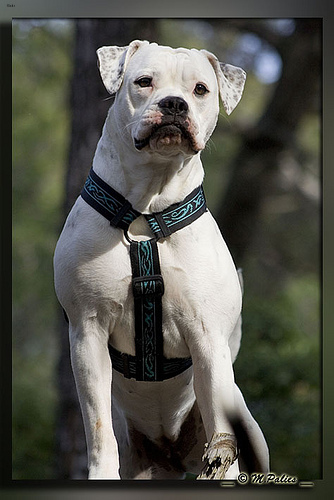

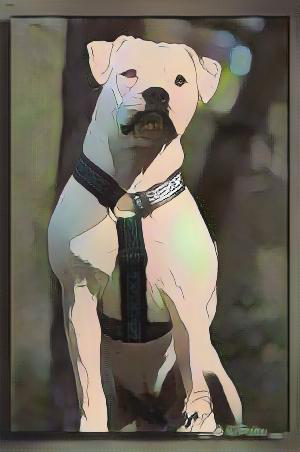

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/dog/american_bulldog_34.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/dog/american_bulldog_34_Hosoda.jpg').convert("RGB"))

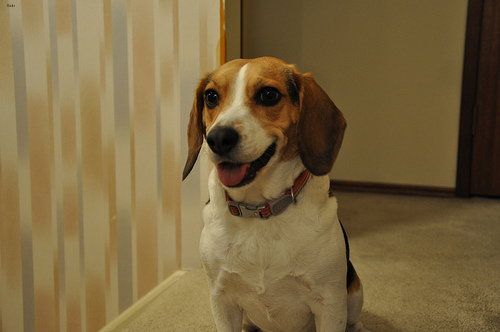

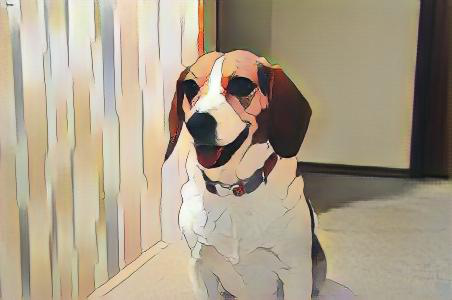

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/dog/beagle_117.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/dog/beagle_117_Hosoda.jpg').convert("RGB"))

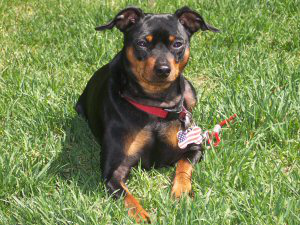

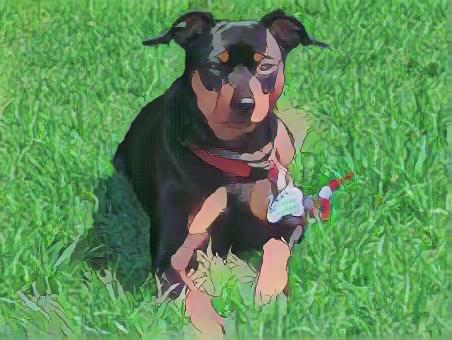

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/dog/miniature_pinscher_154.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/dog/miniature_pinscher_154_Hosoda.jpg').convert("RGB"))

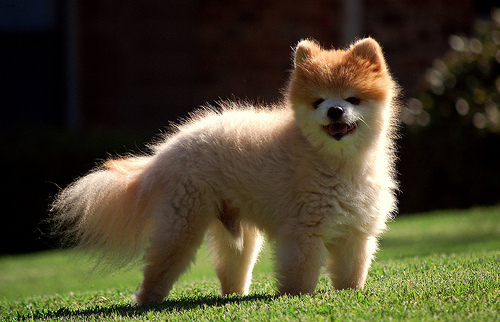

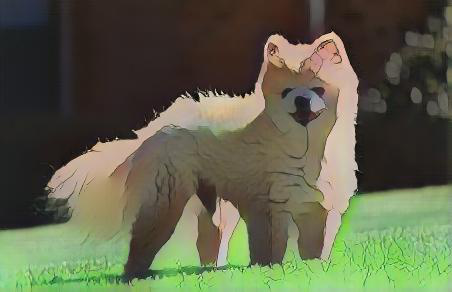

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/dog/pomeranian_87.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/dog/pomeranian_87_Hosoda.jpg').convert("RGB"))

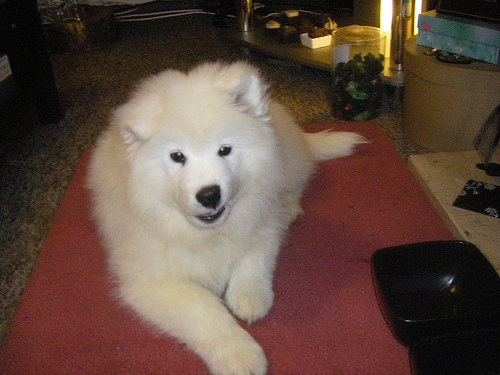

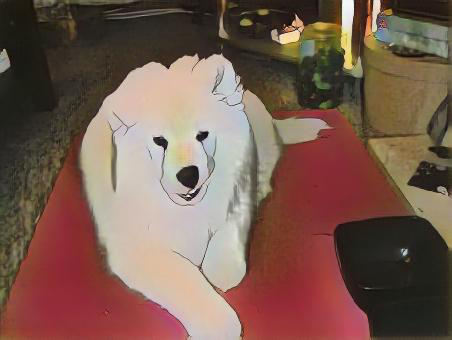

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/dog/samoyed_24.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/dog/samoyed_24_Hosoda.jpg').convert("RGB"))

Here are some examples of (real-world version, cartoonized version) pairs of cat images in our training data.

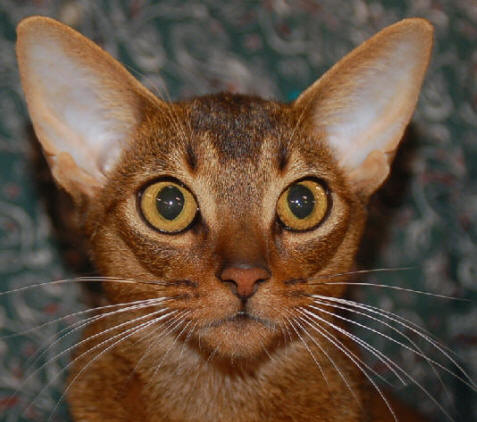

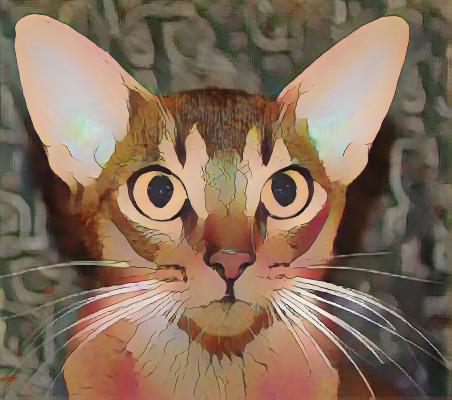

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/cat/Abyssinian_15.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/cat/Abyssinian_15_Hosoda.jpg').convert("RGB"))

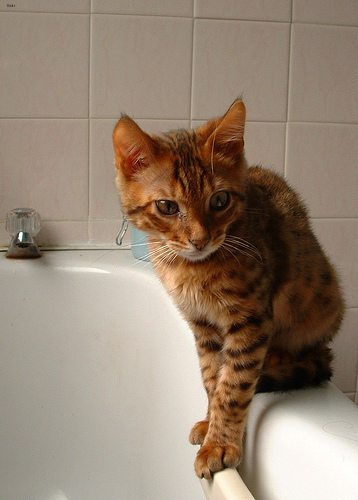

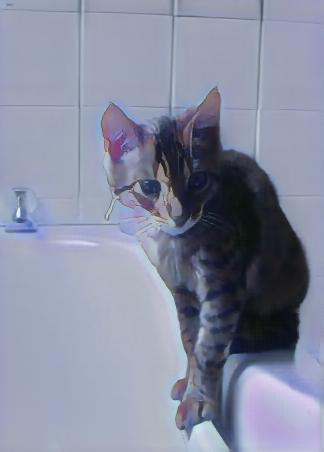

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/cat/Bengal_75.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/cat/Bengal_75_Hosoda.jpg').convert("RGB"))

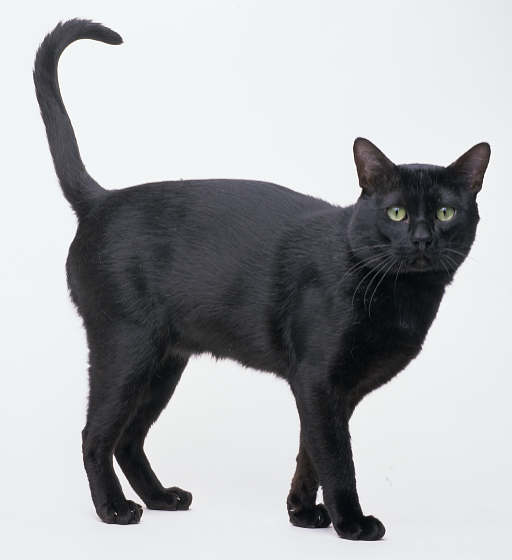

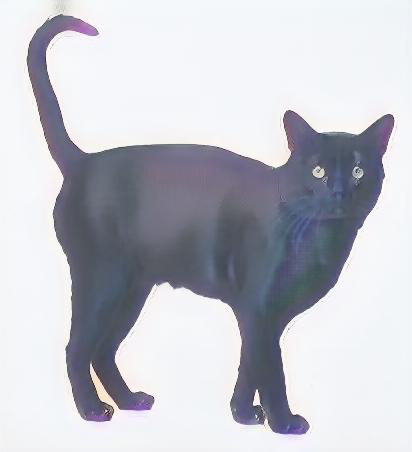

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/cat/Bombay_24.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/cat/Bombay_24_Hosoda.jpg').convert("RGB"))

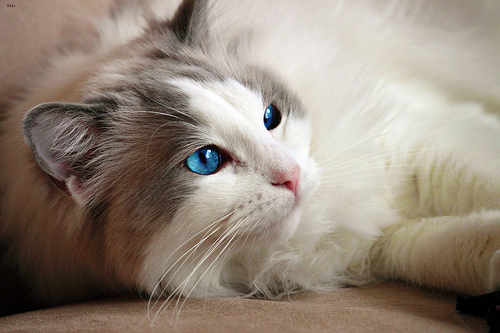

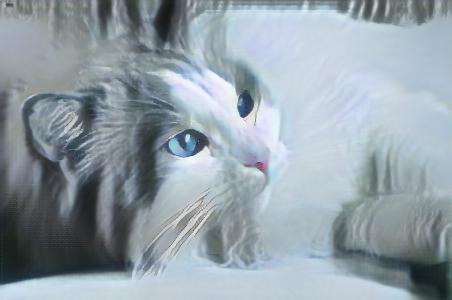

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/cat/Ragdoll_44.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/cat/Ragdoll_44_Hosoda.jpg').convert("RGB"))

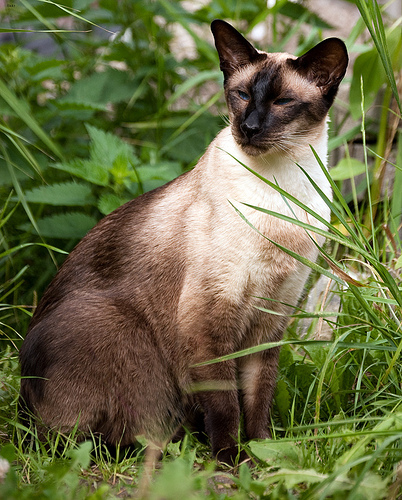

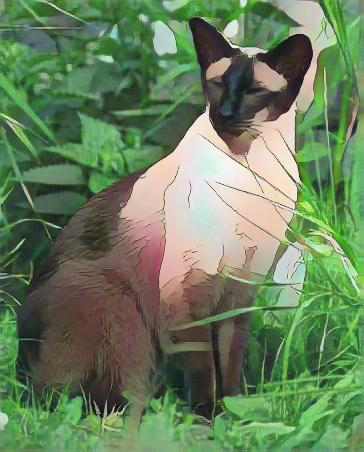

In [ ]:
display(Image.open('/content/drive/My Drive/cartoongan_classification/data/real_images/train/cat/Siamese_79.jpg').convert("RGB"),
        Image.open('/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/cat/Siamese_79_Hosoda.jpg').convert("RGB"))

# Create DataLoaders

We create the following six Pytorch Dataloaders.

- training data, real-world images
- validation data, real-world images
- test data, real-world images
- training data, cartoonized images
- validation data, cartoonized images
- test data, cartoonized images

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

Let's apply the usual transformations for color images that are provided in the torchvision guidelines (example: https://pytorch.org/hub/pytorch_vision_resnet/)

In [ ]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_real_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/real_images/train/',
                                          transform=transformations)
val_real_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/real_images/val/',
                                        transform=transformations)
test_real_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/real_images/test/',
                                         transform=transformations)

train_cartoonized_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/train/',
                                                 transform=transformations)
val_cartoonized_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/val/',
                                               transform=transformations)
test_cartoonized_dataset = datasets.ImageFolder(root='/content/drive/My Drive/cartoongan_classification/data/cartoonized_images/test/',
                                                transform=transformations)

In [ ]:
print("'train_real_dataset' contains {} datapoints".format(len(train_real_dataset)))
print("'val_real_dataset' contains {} datapoints".format(len(val_real_dataset)))
print("'test_real_dataset' contains {} datapoints".format(len(test_real_dataset)))
print("")
print("'train_cartoonized_dataset' contains {} datapoints".format(len(train_cartoonized_dataset)))
print("'val_cartoonized_dataset' contains {} datapoints".format(len(val_cartoonized_dataset)))
print("'test_cartoonized_dataset' contains {} datapoints".format(len(test_cartoonized_dataset)))

'train_real_dataset' contains 2936 datapoints
'val_real_dataset' contains 978 datapoints
'test_real_dataset' contains 980 datapoints

'train_cartoonized_dataset' contains 2936 datapoints
'val_cartoonized_dataset' contains 978 datapoints
'test_cartoonized_dataset' contains 980 datapoints


In [ ]:
# cats are labeled as 0, and dogs are labeled as 1.
print("'train_real_dataset' label id mapping: {}".format(train_real_dataset.class_to_idx))
print("'val_real_dataset' label id mapping: {}".format(val_real_dataset.class_to_idx))
print("'test_real_dataset' label id mapping: {}".format(test_real_dataset.class_to_idx))
print("")
print("'train_cartoonized_dataset' label id mapping: {}".format(train_cartoonized_dataset.class_to_idx))
print("'val_cartoonized_dataset' label id mapping: {}".format(val_cartoonized_dataset.class_to_idx))
print("'test_cartoonized_dataset' label id mapping: {}".format(test_cartoonized_dataset.class_to_idx))

'train_real_dataset' label id mapping: {'cat': 0, 'dog': 1}
'val_real_dataset' label id mapping: {'cat': 0, 'dog': 1}
'test_real_dataset' label id mapping: {'cat': 0, 'dog': 1}

'train_cartoonized_dataset' label id mapping: {'cat': 0, 'dog': 1}
'val_cartoonized_dataset' label id mapping: {'cat': 0, 'dog': 1}
'test_cartoonized_dataset' label id mapping: {'cat': 0, 'dog': 1}


In [ ]:
train_real_dataloader = DataLoader(dataset=train_real_dataset, batch_size=32, shuffle=True)
val_real_dataloader = DataLoader(dataset=val_real_dataset, batch_size=32, shuffle=False)
test_real_dataloader = DataLoader(dataset=test_real_dataset, batch_size=32, shuffle=False)

train_cartoonized_dataloader = DataLoader(dataset=train_cartoonized_dataset, batch_size=32, shuffle=True)
val_cartoonized_dataloader = DataLoader(dataset=val_cartoonized_dataset, batch_size=32, shuffle=False)
test_cartoonized_dataloader = DataLoader(dataset=test_cartoonized_dataset, batch_size=32, shuffle=False)

Now we are prepared to conduct some experiments to answer our questions that were introduced earlier.

Here is the training function that we will use. (references: https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html, https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

In [ ]:
import copy

In [ ]:
def train(model, train_dataloader, val_dataloader, num_epochs, criterion, optimizer, print_intermediate_loss=False):
    sigmoid = nn.Sigmoid()
    
    best_val_acc = 0.0
    best_model_weights = copy.deepcopy(model.state_dict())

    for epoch in range(0, num_epochs):
        print('-' * 50)
        print("Starting epoch {}/{}".format(epoch+1, num_epochs))

        model.train()
        avg_train_loss = 0.0
        num_train_total, num_train_correct = 0, 0
        for batch_i, data in enumerate(train_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            outputs = outputs.flatten()
            outputs_prob = sigmoid(outputs)
            
            # predict as label 1 if probability > 0.5
            predictions = torch.gt(outputs_prob, 0.5).int()
            num_train_total += inputs.size(0)
            num_train_correct += torch.sum(predictions == labels.data).item()

            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            avg_train_loss = ((avg_train_loss * batch_i) + loss.item()) / (batch_i + 1)
            if print_intermediate_loss and (batch_i + 1) % 10 == 0:
                print("   At the end of batch {}/{} of epoch {}, average train loss so far is {}".format(batch_i+1, len(train_dataloader), epoch+1, round(avg_train_loss, 3)))
        
        model.eval()
        num_val_total, num_val_correct = 0, 0
        for batch_i, data in enumerate(val_dataloader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)
            
            outputs = outputs.flatten()
            outputs_prob = sigmoid(outputs)
            
            # predict as label 1 if probability > 0.5
            predictions = torch.gt(outputs_prob, 0.5).int()
            num_val_total += inputs.size(0)
            num_val_correct += torch.sum(predictions == labels.data).item()

        print("Num train total {}, Num train correct {}, Train accuracy {}, Average train loss {}".format(num_train_total, num_train_correct, round(num_train_correct / num_train_total, 3), round(avg_train_loss, 3)))
        print("Num validation total {}, Num validation correct {}, Validation accuracy {}".format(num_val_total, num_val_correct, round(num_val_correct / num_val_total, 3)))
        if best_val_acc < num_val_correct / num_val_total:
            best_val_acc = num_val_correct / num_val_total
            best_model_weights = copy.deepcopy(model.state_dict())
    
    print("")
    print('-' * 50)
    print('-' * 50)
    print("Done. Best validation accuracy is {}".format(round(best_val_acc, 3)))
    model.load_state_dict(best_model_weights)
    return model

Here is a function for using the trained model for prediction (so no more training). It will provide the accuracy.

In [ ]:
def predict(model, dataloader):
    sigmoid = nn.Sigmoid()

    model.eval()
    num_total, num_correct = 0, 0
    for batch_i, data in enumerate(dataloader):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
        
        outputs = outputs.flatten()
        outputs_prob = sigmoid(outputs)
        
        # predict as label 1 if probability > 0.5
        predictions = torch.gt(outputs_prob, 0.5).int()
        num_total += inputs.size(0)
        num_correct += torch.sum(predictions == labels.data).item()

    print("Num total {}, Num correct {}, Accuracy {}".format(num_total, num_correct, round(num_correct / num_total, 3)))

# Question 1: If we train an image classification model with cartoonized images (as a binary classification of dogs and cats), how well will it perform on classifying real-world images of dogs and cats?

(i.e. ***TRAIN & VALIDATION: cartoonized images, TEST: real-world images***)

In [ ]:
import torch.nn as nn
import torchvision.models as models
import torch.optim

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: {}'.format(device))

device: cuda


Let's use a Resnet18 model (train from scratch). The Resnet paper link is: https://arxiv.org/pdf/1512.03385.pdf. We choose not to fine-tune since we don't want the model to have any signal/learning from real-world images: it should solely focus on cartoonized images during training.

The original Resnet18 model was designed to predict on the ImageNet dataset which has 1000 classes (so it's a multiclass classification task). So the model's fully-connected layer has 1000 output units of logits (then, the softmax function is applied so that the logits become probabilities that sum to 1).

Since our task is binary classification (which is essentially "yes" or "no"), let's modify the fully connected layer in the last part of the model architecture so that the model's final output is just one unit: i.e. one logit value (then, the sigmoid function will be used to compute the probability that the datapoint is a "yes"). In our case, since dogs are labeled as 1, the model's final output (with sigmoid) is essentially the probability that the input is a dog image.

In [ ]:
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(in_features=512, out_features=1)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Since our task is binary classification, let's use *nn.BCEWithLogitsLoss()* (i.e. sigmoid + binary cross-entropy) as our loss function.

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model = train(model=model, train_dataloader=train_cartoonized_dataloader, val_dataloader=val_cartoonized_dataloader,
              num_epochs=40, criterion=criterion, optimizer=optimizer)

--------------------------------------------------
Starting epoch 1/40
Num train total 2936, Num train correct 1694, Train accuracy 0.577, Average train loss 0.712
Num validation total 978, Num validation correct 600, Validation accuracy 0.613
--------------------------------------------------
Starting epoch 2/40
Num train total 2936, Num train correct 1879, Train accuracy 0.64, Average train loss 0.635
Num validation total 978, Num validation correct 592, Validation accuracy 0.605
--------------------------------------------------
Starting epoch 3/40
Num train total 2936, Num train correct 1913, Train accuracy 0.652, Average train loss 0.627
Num validation total 978, Num validation correct 608, Validation accuracy 0.622
--------------------------------------------------
Starting epoch 4/40
Num train total 2936, Num train correct 1997, Train accuracy 0.68, Average train loss 0.604
Num validation total 978, Num validation correct 654, Validation accuracy 0.669
--------------------------

The model's evaluation data accuracy is 80%.

We won't do further hyperparameter tuning in order to achieve higher validation accuracy since our primary interest is not necessarily about getting a 'better' model but more about the level of discrepancy between classifying real-world images and classifying cartoonized images (for the model).

We simply let the model, which has never seen any real-world images during training, predict on the test dataloader of real-world images.

In [ ]:
predict(model=model, dataloader=test_real_dataloader)

Num total 980, Num correct 733, Accuracy 0.748


The model's accuracy on the real-world images is 75%, which is reasonably similar to its performance on the cartoonized validation set. So it seems that for the model, the discrepancy of classifying real-world image and classifying a cartoonized image (in terms of difficulty) is not too big.

# Question 2: If we train an image classification model with real-world images, how well will it perform on classifying cartoonized images?

(i.e. ***TRAIN & VALIDATION: real-world images, TEST: cartoonized images***)

This is just the opposite direction of Question 2, so we can imagine that we will probably end up with a similar conclusion.

Since we will be training the model with real-world color images, let's fine-tune a pre-trained model instead of training from scratch.

In [ ]:
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(in_features=512, out_features=1)
model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model = train(model=model, train_dataloader=train_real_dataloader, val_dataloader=val_real_dataloader,
              num_epochs=3, criterion=criterion, optimizer=optimizer)

--------------------------------------------------
Starting epoch 1/3
Num train total 2936, Num train correct 2641, Train accuracy 0.9, Average train loss 0.223
Num validation total 978, Num validation correct 897, Validation accuracy 0.917
--------------------------------------------------
Starting epoch 2/3
Num train total 2936, Num train correct 2799, Train accuracy 0.953, Average train loss 0.122
Num validation total 978, Num validation correct 883, Validation accuracy 0.903
--------------------------------------------------
Starting epoch 3/3
Num train total 2936, Num train correct 2837, Train accuracy 0.966, Average train loss 0.091
Num validation total 978, Num validation correct 923, Validation accuracy 0.944

--------------------------------------------------
--------------------------------------------------
Done. Best validation accuracy is 0.944


Not surprisingly, when we fine-tune a pre-trained resnet model on real-world color images, we get high performance (both training and validation).

Now let's compare the model's predictive performance (total and class-wise) on the validation data (real-world images) to its performance on the test data (cartoonized images).

In [ ]:
predict(model=model, dataloader=test_cartoonized_dataloader)

Num total 980, Num correct 856, Accuracy 0.873


The model's performance on the real-world validation set (accuracy 94%) is better than its performance on the cartoonized test set (accuracy 87%), but the difference is reasonably small.

So again, it seems that the discrepancy between the task of classifying real-world dog/cat imgaes and the task of classifying cartoonized dog/cat images is not that big.

# Datasets/Papers Reference

- Oxford-IIIT Pet Dataset (paper link: https://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf)
        Cats and Dogs
        Parkhi, O. M. and Vedaldi, A. and Zisserman, A. and Jawahar, C.~V.
        IEEE Conference on Computer Vision and Pattern Recognition, 2012

- CartoonGAN paper
        CartoonGAN: Generative Adversarial Networks for Photo Cartoonization
        Chen, Yang and Lai, Yu-Kun and Liu, Yong-Jin
        Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition
        2018

- Resnet paper
        Deep Residual Learning for Image Recognition
        He, Kaiming and Zhang, Xiangyu and Ren, Shaoqing and Sun, Jian
        Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition
        2016